# DAMA Day Workshop

## Welcome to this DAMA Day Workshop!
If you have any questions about this notebook, please contact us:  
Victoria Da Poian (victoria.dapoian@nasa.gov)  
Eric Lyness (eric.i.lyness@nasa.gov)  

### In this notebook:
- Processing the Data
- Exploring the Data 
- Putting data in a ML format
- Provide some ideas / actions to work on during the workshop

Data = Csv file with :
- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for params (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

### Python Environment Setup

#### (1) If you gitclone, running it locally/VM

In [18]:
!pwd

/Users/soyoungpark/Desktop/DAMADAY2020_NASA


In [20]:
!ls -lrt #You will see files, as following.

total 1085752
-rw-r--r--@ 1 soyoungpark  staff  110976485 Sep 24 10:48 ml_data_damaday.csv
-rw-r--r--@ 1 soyoungpark  staff  190712153 Sep 29 16:16 DataScienceUMDTalk_MOMAML_1505 (1).pptx
-rw-r--r--@ 1 soyoungpark  staff       1069 Oct  6 19:00 LICENSE
-rw-r--r--  1 soyoungpark  staff       2341 Oct  7 09:37 README.md
-rw-r--r--@ 1 soyoungpark  staff  111324662 Oct  7 13:05 SpectraInArrayInOneColumn.csv
-rw-r--r--@ 1 soyoungpark  staff  107698487 Oct  8 15:13 ml_data_damaday_final_VDP.csv
-rw-r--r--@ 1 soyoungpark  staff     145138 Oct  8 19:25 SoyoungEDALocal.ipynb
-rw-r--r--@ 1 soyoungpark  staff     128729 Oct  9 08:28 NotebookWorkshop_VDP.ipynb
-rw-r--r--  1 soyoungpark  staff       4852 Oct 10 17:07 requirement.txt
drwxr-xr-x  5 soyoungpark  staff        160 Oct 12 07:09 training_1
-rw-r--r--@ 1 soyoungpark  staff     869507 Oct 15 05:52 SoyoungAppendToVDP.ipynb
-rw-r--r--@ 1 soyoungpark  staff     671291 Oct 15 05:55 IwillbeOfficial_local.ipynb


In [19]:
#!pip install -r requirement.txt #This is only needed when you initiate the python environment for the first time.

In [21]:
!which python #This python interpreter is what you will use for this notebook. 

/Users/soyoungpark/anaconda3/bin/python


In [22]:
!echo $CONDA_DEFAULT_ENV #this is the name of your Conda Python Environment 

base


In [23]:
from platform import python_version

print(python_version())

3.7.6


#### (2) if you run in Zepl, use "DAMA_Python3" image

In [24]:
#!pip install tensorflow==2.3.1 scikit-learn matplotlib optuna pyod #Everytime you instantiate a new image, you need to re-install these following packages or you use custom image "DAMA_Python" in Resorces section

In [25]:
#!pip list

### Processing and Exploring the Data

In [ ]:
%reset

#### (1) From Zepl, Download data from Snowflake
Q: is snowflake connector, z available in pip?

In [ ]:
# %python
# import snowflake.connector
# import hashlib

# class SnowflakeDataSource:
#     SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

#     def init_snowflake(self):
#         options = {
#             "account": self.account,
#             "user": self.user,
#             "password": self.password,
#             "database": self.database,
#             "schema": self.schema,
#             "role": self.role,
#             "warehouse": self.warehouse,
#             "authenticator": self.authenticator,
#             "application": self.application
#         }

#         if self.authenticator == "oauth":
#             options["token"] = self.token

#         return snowflake.connector.connect(**options)

#     def init_snowflake_spark(self):
#         sfOptions = {
#             "sfURL": "{}.snowflakecomputing.com".format(self.account),
#             "sfUser": self.user,
#             "sfPassword": self.password,
#             "sfDatabase": self.database,
#             "sfSchema": self.schema,
#             "sfRole": self.role,
#             "sfWarehouse": self.warehouse,
#             "sfAuthenticator": self.authenticator,
#             "application": self.application
#         }

#         if self.authenticator == "oauth":
#             sfOptions["sfToken"] = self.token

#         return spark.read.format(self.SNOWFLAKE_SOURCE_NAME).options(**sfOptions)

#     def establish_connection(self):
#         if self.is_spark():
#             df = self.init_snowflake_spark()
#             z.addDatasource(self.name, df)
#         else:
#             con = self.init_snowflake()
#             z.addDatasource(self.name, con.cursor())
#             z.addDatasource("{}_con".format(self.name), con)

#     def is_spark(self):
#         try:
#             spark
#         except NameError:
#             return False

#         return True

#     def __init__(self, name, account, user, password, database, schema, role, warehouse, authenticator, token, clientId, clientSecret, application):
#         self.name = name
#         self.account = account
#         self.user = user
#         self.password = password
#         self.database = database
#         self.schema = schema
#         self.role = role
#         self.warehouse = warehouse
#         self.authenticator = authenticator
#         self.clientId = clientId
#         self.clientSecret = clientSecret
#         self.token = token
#         self.application = application


#         m = hashlib.md5()
#         # We don't include the token since with the current implementation it will change frequently, but it's not necessary to update the connection with new tokens.
#         m.update(account.encode('utf8') + user.encode('utf8') + password.encode('utf8') + database.encode('utf8') + schema.encode('utf8') + role.encode('utf8') + warehouse.encode('utf8') + authenticator.encode('utf8')+ clientId.encode('utf8') + clientSecret.encode('utf8') + application.encode('utf8'))
#         currentConnectionParamsHash = m.hexdigest()
#         try:
#             z.getDatasource(name)
#         except DatasourceException:
#             # Connection doesn't exist, we need to establish a new one.
#             self.establish_connection()
#             z.add('CONNECTION_PARAMETERS_HASH', currentConnectionParamsHash)
#         else:
#             # A connection exists, we now check whether any connection parameters have changed since the last connection was established.
#             previousConnectionParamsHash = z.get('CONNECTION_PARAMETERS_HASH')
#             if currentConnectionParamsHash != previousConnectionParamsHash:
#                 # Connection parameters have changed, re-establish connection.
#                 self.establish_connection()
#                 z.add('CONNECTION_PARAMETERS_HASH', currentConnectionParamsHash)

# SnowflakeDataSource(name="DAMA_CSV_parkso3", account="RM42265.west-us-2.azure", user="parkso3", password="IloveBrianCMU@1", database="NASA_CSV",
#                     schema="DAMA_DAY_NASA", role="", warehouse="COMPUTE_WH", authenticator="snowflake", clientId="",
#                     clientSecret = "", token="", application="Zepl")

# import pandas as pd
# # establish connection to Snowflake
# cur =z.getDatasource("DAMA_CSV_parkso3")

# #cur = z.getDatasource("NASA_CSV")

# # execute query
# cur = cur.execute('SELECT * FROM dama_nasa_demo_data')# LIMIT 100

# # convert datasource into pandas dataframe
# dataset = cur.fetch_pandas_all()

# # print dataframe as table
# z.show(dataset)

#### (2) or Read csv file

In [26]:
dataset = pd.read_csv('ml_data_damaday_final_VDP.csv')  
dataset.head(2)

,USID,0,1,2,3,4,5,6,7,8,...,1950,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Label1,Label2
0,8198000001,0,0,0,0,0,0,0,0,0,...,0,12.6549,5,0.463842,1,3812,83,0.01,A,10
1,8198000002,0,0,0,0,0,0,0,0,0,...,0,12.2765,5,0.644139,1,2891,99,0.01,A,10


### The data we are using in this notebook:
### Data = Csv file with :
- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for params (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

### Processing and Exploring Data
We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [27]:
import pandas as pd
import os
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Analysis of the Columns (USID, Mass Spec, Params, Labels)

In [28]:
###Columns names
columns_names = dataset.columns.tolist()
listAllParams = columns_names[-9:-2]
print(listAllParams)
nberParams = len(listAllParams)

###Just the params part
dataset_params = dataset[listAllParams]
print(dataset_params)

['Param1', 'Param2', 'Param3', 'Param4', 'Param5', 'Param6', 'Param7']
        Param1  Param2    Param3  Param4  Param5  Param6     Param7
0      12.6549       5  0.463842       1    3812      83   0.010000
1      12.2765       5  0.644139       1    2891      99   0.010000
2      12.7667       5  0.417654       1    2720     102   0.010000
3      12.4442       5  0.712478       1    1961      86   0.010000
4      13.1107       5  0.566622       1    2652      98   0.010000
...        ...     ...       ...     ...     ...     ...        ...
26680  50.5495       1  0.000000       1     767      13  35.279999
26681  50.5172       1  0.000000       1     635      11  35.619999
26682  50.5172       1  0.000000       1     676      13  33.009998
26683  50.5495       1  0.000000       1     757      13  31.400000
26684  50.5172       1  0.000000       1     686      15  31.540001

[26685 rows x 7 columns]


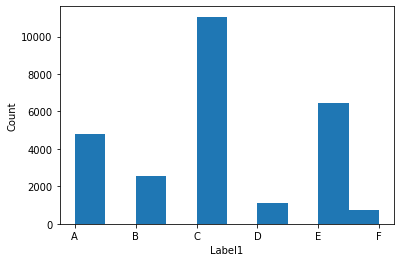

In [29]:
n, bins, patches = plt.hist(dataset.Label1)
plt.xlabel('Label1')
plt.ylabel('Count')
plt.show()

### Define your inputs X and Y

In [30]:
###Here you select the params you want to remove 
listParams = [] #no params to remove
#listParams = ["Param1", "Param2"] #if you want to remove Param1 and Param2

def getRawXy(dataset, listParams): #Soyoung put into a funtion to use for prediction later
    ###Y values (2 options for the labels)
    y_1 = dataset.Label1
    y_2 = dataset.Label2

    ###Define X values (all the dataset, only mass spec data, mass spec data + params)
    Xall = dataset.drop(['Label1','Label2'],axis=1) #all data
    XnoUSID = Xall.drop(['USID'],axis=1) #all data without USID
    XmassSpec = XnoUSID.drop(listAllParams, axis=1) #just mass spec data
    print("XmassSpec.shape",XmassSpec.shape)

    #Which input data X do you want to use?
    X = XnoUSID.drop([param for param in listParams], axis=1)
    inputSize = X.shape[1]

    #Which label y do you want to use?
    y=y_1
    nb_categories = len(pd.unique(y))
    print(nb_categories)

    print(X[:10])
    return X,y,XmassSpec, nb_categories

X,y, XmassSpec, nb_categories = getRawXy(dataset,listParams)

XmassSpec.shape (26685, 1951)
6
   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0

### Plot some mass specs

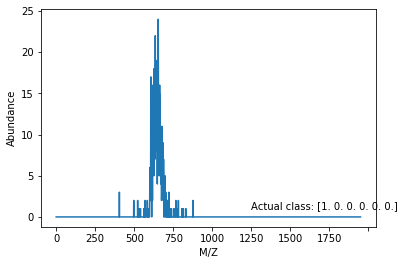

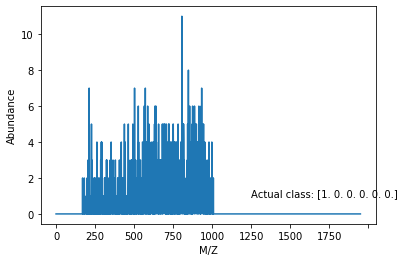

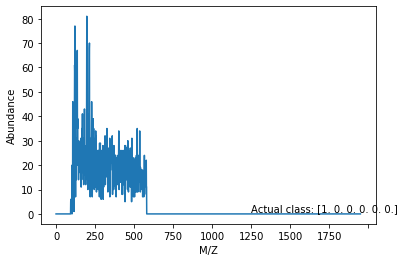

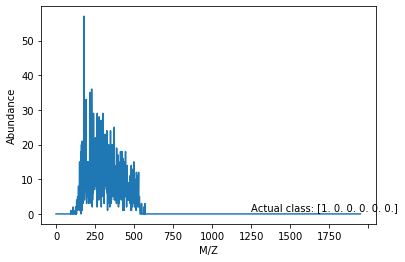

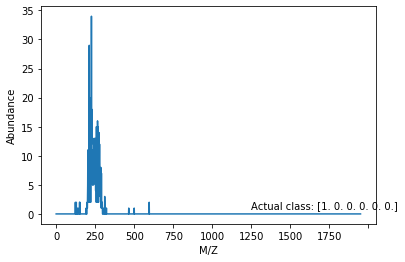

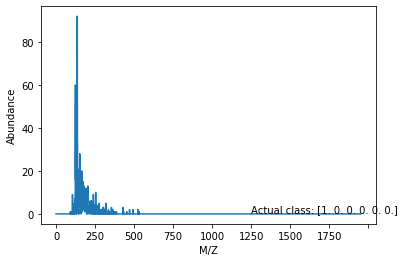

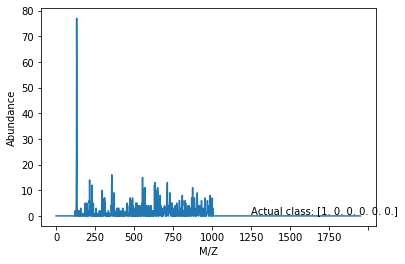

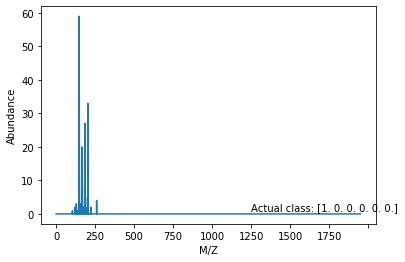

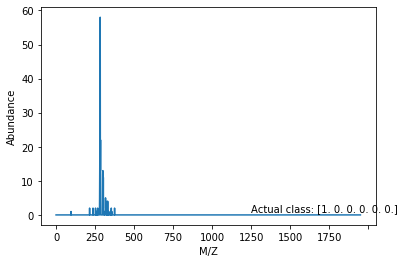

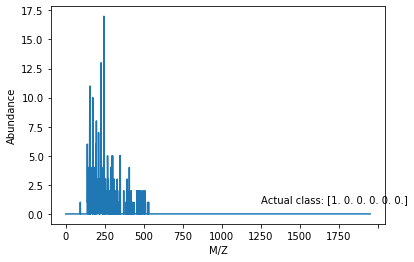

In [82]:
XmassSpec_df=X_train.drop(['Param1', 'Param2', 'Param3', 'Param4','Param5', 'Param6', 'Param7'], axis=1) 

def plot_oneSpectra(onemassSpec=XmassSpec_df.iloc[i], onelabel=Y[i]):
    plt.text(1250, 1, 'Actual class: {}'.format(str(Y[i])))
    ax=onemassSpec.plot()
    ax.set_ylabel('Abundance')
    ax.set_xlabel('M/Z')
    plt.show()
    
for i in range(1,100,10):
    plot_oneSpectra(onemassSpec=XmassSpec_df.iloc[i], onelabel=Y[i])

### Encode the labels as integers (to rework Vic)

In [32]:
#Victoria's 6 column Y
#TO REWORK VIC
#Victoria's 6 column Y

def encoder(dataToEncode): #encode label values (label1 label2) as integer values
    #Soyoung add comment-Label
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    print("encoded_Y", encoded_Y.shape, encoded_Y[:2])
    classes = encoder.classes_
    # convert the vector of integers to dummy variables (i.e. one hot encoded) 
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = encoded_Y.reshape(len(encoded_Y), 1) #Soyoung commented out for 1DCNN training
    Y = onehot_encoder.fit_transform(integer_encoded)
    return(Y) #Soyoung changed from original Y(Onehotencoder) to encoded_Y(labelEncoder)

def printEncodertoLabels(dataToEncode, nb_categories): # print the relations between the class values and the encoded integers
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    for i in range(nb_categories):
        print(str(i) + " : " + encoder.inverse_transform([i]))

def dicEncodertoLabels(dataToEncode, nb_categories): # create a dictionary between the real labels and the encoded integers values
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    arraytoLabelDico = {}
    for k in range(nb_categories):
        encoded_array = np.zeros(nb_categories)
        encoded_array[k] = 1
        inverted_label = encoder.inverse_transform([argmax(encoded_array)])
        arraytoLabelDico[tuple(encoded_array)] = str(inverted_label)
    return(arraytoLabelDico)
 
#Soyoung just put together to transform from raw ABCD y to onehotcoded 6 column Y
def getOneHotEncodedY(y, nb_categories):
    ###Encode class values as integers
    Y = encoder(y) #Note, Soyoung did not reshape y.
    print("Y", Y.shape)
    printEncodertoLabels(y, nb_categories)
    arraytoLabelDico = dicEncodertoLabels(y, nb_categories)
    print(arraytoLabelDico)
    #print("\nX: {} ; X(noUSID): {} ; y (initial): {} ; Y(encoded): {} ".format(X.shape, XnoUSID.shape, y.shape, Y.shape)) #Soyoung comment out
    print("\nX: {} ; y (initial): {} ; Y(encoded): {} ".format(X.shape,   y.shape, Y.shape))
    print("\nList of the different {} labels:\n {}  ".format(nb_categories, pd.unique(y)))
    return Y

#Soyoung to transform from raw ABCD y to 1 column integer classfication y
def getLabelEncodedy(y):
    encoder_l = LabelEncoder()
    encoded_y = encoder_l.fit_transform(y)
    print("encoded_y", encoded_y.shape, encoded_y[:2])    
    
    return encoded_y

Y=getOneHotEncodedY(y,nb_categories)

encoded_Y (26685,) [0 0]
Y (26685, 6)
['0 : A']
['1 : B']
['2 : C']
['3 : D']
['4 : E']
['5 : F']
{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0): "['A']", (0.0, 1.0, 0.0, 0.0, 0.0, 0.0): "['B']", (0.0, 0.0, 1.0, 0.0, 0.0, 0.0): "['C']", (0.0, 0.0, 0.0, 1.0, 0.0, 0.0): "['D']", (0.0, 0.0, 0.0, 0.0, 1.0, 0.0): "['E']", (0.0, 0.0, 0.0, 0.0, 0.0, 1.0): "['F']"}

X: (26685, 1958) ; y (initial): (26685,) ; Y(encoded): (26685, 6) 

List of the different 6 labels:
 ['A' 'B' 'C' 'D' 'E' 'F']  


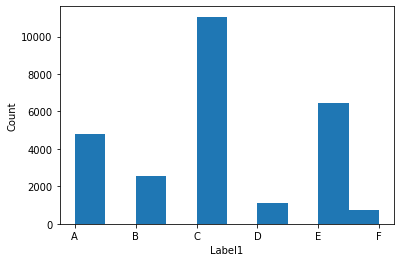

In [33]:
### check clasification distribution
n, bins, patches = plt.hist(y)
plt.xlabel('Label1')
plt.ylabel('Count')
plt.show()

### Preparing the data for ML applications

#### Let's split the dataset into training, testing sets.

In [34]:
###Split dataset ratios
train_test_ratio = 0.2 #80% is used for the training
test_val_ratio = 0.5 #Half for validation, half for testing

def preprocess_dataset(dataset):
    X, y, XmassSpec, nb_labels = getRawXy(dataset,listParams)
    yencoded=getLabelEncodedy(y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, yencoded, test_size=train_test_ratio)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = preprocess_dataset(dataset)
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

XmassSpec.shape (26685, 1951)
6
   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0

# Classification Approach and Outlier Detection Problem

The purpose of the following is to provide the audience a structure for several tasks / subtasks that could be investigated.  

The following example approaches (TO DO part) are provided by   
Soyoung Park, Data Scientist at Lam Research  
Email: soyoung.park.mse@gmail.com

This is only to provide a boiler plates to facillatate each volunteer to jump on the actual problems easier.  

### Multiclassification Problem 

In [95]:
# TO DO: define your model
#Without manual feature engineering/dimentionlity reduction  
#Main reference: https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2c
        
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Reshape,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#X_train: (21348, 1958)
#Y_train: (21348, )
n_spectrastep=X_train.shape[1]
num_sensors=1
output_classes=to_categorical(Y_train).shape[1]

def baseline_model(output_classes):
    #Simplest 1 layer 1DCNN
    model0 = models.Sequential()
    model0.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model0.add(Conv1D(filters=64, kernel_size=10, activation='relu')) 
    model0.add(Flatten()) 
    model0.add(Dense(output_classes,  activation='softmax'))
    model0.summary()
    return model0

model0=baseline_model(output_classes)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1958, 1)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1949, 64)          704       
_________________________________________________________________
flatten_3 (Flatten)          (None, 124736)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 748422    
Total params: 749,126
Trainable params: 749,126
Non-trainable params: 0
_________________________________________________________________


References

https://www.datacamp.com/community/tutorials/cnn-tensorflow-python
https://www.tensorflow.org/guide/keras/sequential_model  
https://www.tensorflow.org/tutorials/images/cnn  
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/  
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/  
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/  

In [96]:
# TO DO: train the model

BATCH_SIZE=32
SEED=42

# save model
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

##################
#[1] Onetime fit  
#https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
##################
 
def fit(model, EPOCHS):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit([X_train], 
                            batch_size=BATCH_SIZE, 
                            y=to_categorical(Y_train), \
                            verbose=1, \
                            validation_split=0.25, 
                            shuffle=True, 
                            epochs=EPOCHS, 
                            callbacks=[cp_callback])

    return history

history0=fit(model0, EPOCHS=3)  

##################
#[2] Cross validation
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# ##################
# estimator = KerasClassifier(build_fn=baseline_model, \
#                             epochs=1, batch_size=BATCH_SIZE, verbose=1)

# kfold = KFold(n_splits=3, shuffle=True, random_state=SEED)
# results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# ##################

Epoch 1/3
499/501 [============================>.] - ETA: 0s - loss: 2.4864 - accuracy: 0.7973
Epoch 00001: val_loss improved from inf to 0.72590, saving model to training_1/cp.ckpt
501/501 [==============================] - 12s 23ms/step - loss: 2.4811 - accuracy: 0.7976 - val_loss: 0.7259 - val_accuracy: 0.8893
Epoch 2/3
500/501 [============================>.] - ETA: 0s - loss: 0.4659 - accuracy: 0.9027
Epoch 00002: val_loss improved from 0.72590 to 0.61362, saving model to training_1/cp.ckpt
501/501 [==============================] - 13s 25ms/step - loss: 0.4658 - accuracy: 0.9026 - val_loss: 0.6136 - val_accuracy: 0.8748
Epoch 3/3
500/501 [============================>.] - ETA: 0s - loss: 0.2661 - accuracy: 0.9254
Epoch 00003: val_loss improved from 0.61362 to 0.46576, saving model to training_1/cp.ckpt
501/501 [==============================] - 14s 28ms/step - loss: 0.2661 - accuracy: 0.9254 - val_loss: 0.4658 - val_accuracy: 0.9078


167/167 - 1s - loss: 0.3679 - accuracy: 0.9063
Restored model, accuracy: 90.63%


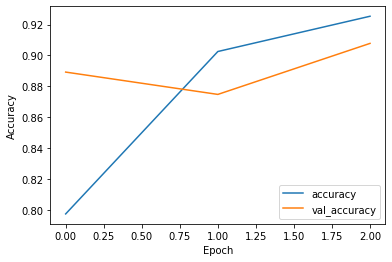

In [115]:
# TO DO: evaluate the model. 

#plot accuracy, loss during training and validation
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
     
plot_history(history0)

loss, acc = model0.evaluate(X_test,  to_categorical(Y_test), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

In [100]:
#TO DO:  Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model0.save('my_model0.h5') 

In [102]:
! ls -lrt

total 1102544
-rw-r--r--@ 1 soyoungpark  staff  110976485 Sep 24 10:48 ml_data_damaday.csv
-rw-r--r--@ 1 soyoungpark  staff  190712153 Sep 29 16:16 DataScienceUMDTalk_MOMAML_1505 (1).pptx
-rw-r--r--@ 1 soyoungpark  staff       1069 Oct  6 19:00 LICENSE
-rw-r--r--  1 soyoungpark  staff       2341 Oct  7 09:37 README.md
-rw-r--r--@ 1 soyoungpark  staff  111324662 Oct  7 13:05 SpectraInArrayInOneColumn.csv
-rw-r--r--@ 1 soyoungpark  staff  107698487 Oct  8 15:13 ml_data_damaday_final_VDP.csv
-rw-r--r--@ 1 soyoungpark  staff     145138 Oct  8 19:25 SoyoungEDALocal.ipynb
-rw-r--r--@ 1 soyoungpark  staff     128729 Oct  9 08:28 NotebookWorkshop_VDP.ipynb
-rw-r--r--@ 1 soyoungpark  staff     869507 Oct 15 06:02 SoyoungAppendToVDP.ipynb
drwxr-xr-x  3 soyoungpark  staff         96 Oct 15 06:46 saved_model
-rw-r--r--  1 soyoungpark  staff       9305 Oct 15 06:49 requirement.txt
drwxr-xr-x  5 soyoungpark  staff        160 Oct 15 10:09 training_1
-rw-r--r--@ 1 soyoungpark  staff     242223 Oct 15 

In [109]:
#TO DO: retrieve the model

#!ls {checkpoint_dir}
# Recreate the exact same model, including its weights and the optimizer
pretrained_model = tf.keras.models.load_model('my_model0.h5')

# Show the model architecture
pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1958, 1)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1949, 64)          704       
_________________________________________________________________
flatten_3 (Flatten)          (None, 124736)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 748422    
Total params: 749,126
Trainable params: 749,126
Non-trainable params: 0
_________________________________________________________________


In [112]:
#TO DO: confirm, pretrained model is performaing the same way as when it was trained.
loss, acc = pretrained_model.evaluate(X_test,  to_categorical(Y_test), verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

167/167 - 1s - loss: 0.3679 - accuracy: 0.9063
Restored model, accuracy: 90.63%


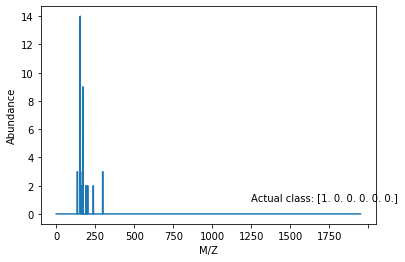

For sample i= 4143 predicted Label[0,1,2,3,4,5]: 2
accuracy score for all X_test: 0.9063144088439198


In [119]:
# TO DO: inter a class/label for a random Xtest data
from sklearn.metrics import accuracy_score

XmassSpec_df=X_test.drop(['Param1', 'Param2', 'Param3', 'Param4','Param5', 'Param6', 'Param7'], axis=1) 

# plot one test sample spectra
i=np.random.randint(len(X_test))
plot_oneSpectra(onemassSpec=XmassSpec_df.iloc[i], onelabel=Y[i])
    
# Infer with the pre-trained model    
predicted = pretrained_model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
 
print("For sample i=", i, "predicted Label[0,1,2,3,4,5]:",predicted[i])
print("accuracy score for all X_test:", accuracy_score(Y_test, predicted)); 

#This "retriving model-inferencing" can be deployed to a Flask App endpoint!
#https://medium.com/x8-the-ai-community/first-steps-building-and-deploying-a-keras-model-40381d9037db

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1958, 1)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1958, 1)           4         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1956, 256)         1024      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1954, 64)          49216     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1954, 64)          256       
_________________________________________________________________
dropout (Dropout)            (None, 1954, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 125056)           

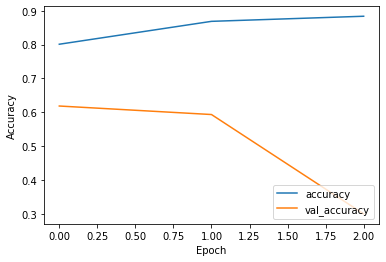

In [40]:
# TO DO: improve model (architecture, hyperparameters tuning, ...)

def build_improved_model(output_classes):
    model1= models.Sequential()
    model1.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model1.add(BatchNormalization())
    model1.add(Conv1D(filters=256, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Flatten()) 
    model1.add(Dense(output_classes, activation='softmax'))   
    model1.summary()
    return model1

model1=build_improved_model(output_classes)
history1=fit(model1, EPOCHS=3) #Check if model runs or not with EPOCHS=1 first, then, increase EPOCHS.
plot_history(history1)

In [41]:
# TO DO: Optimize Hyperparameters

# (1) define default hyperparameters you want to optimize
class Args:
    
    #learning
    BATCH_SIZE=32
    EPOCHS=3
    
    #1DCNN
    NumFilter1DCNN1=128
    NumFilter1DCNN2=64
    KERNEL_SIZE=3
    
    #Misc
    DROPOUTRATE=0.5
    
args=Args()

# (2) parameterize all hyperparameters 
def build_improved_model_parameterized(output_classes):
    model2= models.Sequential()
    model2.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
    model2.add(BatchNormalization())
    model2.add(Conv1D(filters=NumFilter1DCNN1, kernel_size=KERNEL_SIZE, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model2.add(Conv1D(filters=NumFilter1DCNN2, kernel_size=KERNEL_SIZE, activation='relu', \
                    input_shape=(n_spectrastep,num_sensors))) 
    model2.add(BatchNormalization())
    model2.add(Dropout(DROPOUTRATE))
    model2.add(Flatten()) 
    model2.add(Dense(output_classes, activation='softmax'))   
    model2.summary()
    return model2

#(3) train the model with many different combination of hyperparameters either 
# (a) with simple for loop/ distributed spark jobs (one combination-onerun/one node)
# (b) with commercial open source packages or 
#     There are many Hyperparameter optimization methodology, one of them 
#     I was personally interested in trying was https://optuna.org/

#Misc; Tensorboard (tensorflow sub-dependent package) is another useful tool to use.
#in CLI, tensorboard --logdir=logs\\scalars --host="" 

In [ ]:
#TO DO: Plot ROC, Confution matrix, F2 score. 
#For Precision and recall are key parameters to measure the accuracy of the classifier.

### Anomaly Detection Problem

There are various approaches out there people have already solved and published out. 
Starting from reading review papers on anomaly detection methodologies:

1. [machine learning based](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)

Outlier Detection and Removal  
Dataset and Performance Baseline  
 -  House Price Regression Dataset  
 -  Baseline Model Performance  
Automatic Outlier Detection  
 -  Isolation Forest  
 -  Minimum Covariance Determinant  
 -  Local Outlier Factor  
 -  One-Class SVM  

[sklearn code is here](https://scikit-learn.org/stable/modules/outlier_detection.html)

2. [DEEP LEARNING FOR ANOMALY DETECTION: A SURVEY](https://arxiv.org/pdf/1901.03407.pdf)

3. [pyod Python library](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)

check out the interactive Jupyter notebook https://pyod.readthedocs.io/en/latest/


Summary above: Various approaches from simple to complex order:

Potential flow #1

Step 1. Feature extraction to a single number per scan based on (ref 1)  
Step 2. Multiclass classification (ref 2)  
Step 3. Show probability of each class 


Potential flow #2

Step 1. Feature extraction to a single number per scan based on (ref 1)  
Step 2. show probability off of clusters (ref 3)  


(ref 1) [PCA-Kmeans/GMM clustering](https://github.com/parksoy/Udacity_nanoDegree_MachineLearning/blob/master/customer_segments/customer_segments.ipynb)


(ref 2) [ML Classifier based](https://github.com/parksoy/Udacity_nanoDegree_MachineLearning/blob/master/finding_donors/finding_donors.ipynb)

 - randomforest classifier  
 -  decision tree classifier  
 -  SVC  
 -  Radial Basis Function (RBF)


(ref 3) [Univariate Outlier detection -statistically](https://towardsdatascience.com/a-complete-anomaly-detection-algorithm-from-scratch-in-python-step-by-step-guide-e1daf870336e)  

#TO DO:  Feature extraction, then, visualize clusters to see how distribution looks like.

Deep Anomaly Detection/Feature extraction references  

1. [Unsupervised Anomaly Detection in Multivariate SpatioTemporal Datasets using Deep Learning](https://project.inria.fr/aaltd19/files/2019/08/AALTD_19_Karadayi.pdf)  

Local Outlier Factor (LOF), is one of the most popular algorithms that quantifies
the outlierness of an object.    

2. [how to build autoencoder](https://www.pyimagesearch.com/2020/02/17/autoencoders-with-keras-tensorflow-and-deep-learning/)
3. [CNN-LSTM Encoder-Decoder based anomaly detection](https://www.mdpi.com/2076-3417/10/15/5191/pdf)  
4. [VGG-16 net->PCA clustering-> feature vector for turbine blades failure detection](https://www.mdpi.com/2076-3417/10/15/5191/pdf)  
5. [Traditional models review](https://www.sciencedirect.com/science/article/pii/S2590198220300233)
traditional models often fail to fully capture complex structures in the data  
 - using parametric and non-parametric statistical models, 
 - data clustering, 
 - rule-based systems, 
 - mixture models, 
 - and SVMs (Support Vector Machines)
 - 
 
 
 6. [Unsupervised Anomaly Detection in Multivariate
Spatio-Temporal Data Using Deep Learning: Early
Detection of COVID-19 Outbreak in Italy](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9187620)

7. [](https://arxiv.org/pdf/1901.03407.pdf)



### Other ideas for classification / detection

#TO DO: 

3. [pyod Python library](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)

check out the interactive Jupyter notebook https://pyod.readthedocs.io/en/latest/


Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Feature Bagging
Model 4 Histogram-base Outlier Detection (HBOS)
Model 5 Isolation Forest
Model 6 K Nearest Neighbors (KNN)
Model 7 Average KNN
Model 8 Local Outlier Factor (LOF)
Model 9 Minimum Covariance Determinant (MCD)
Model 10 One-class SVM (OCSVM)
Model 11 Principal Component Analysis (PCA)
Model 12 Locally Selective Combination (LSCP)
1 fitting Angle-based Outlier Detect

ValueError: x and y must have length at least 2.

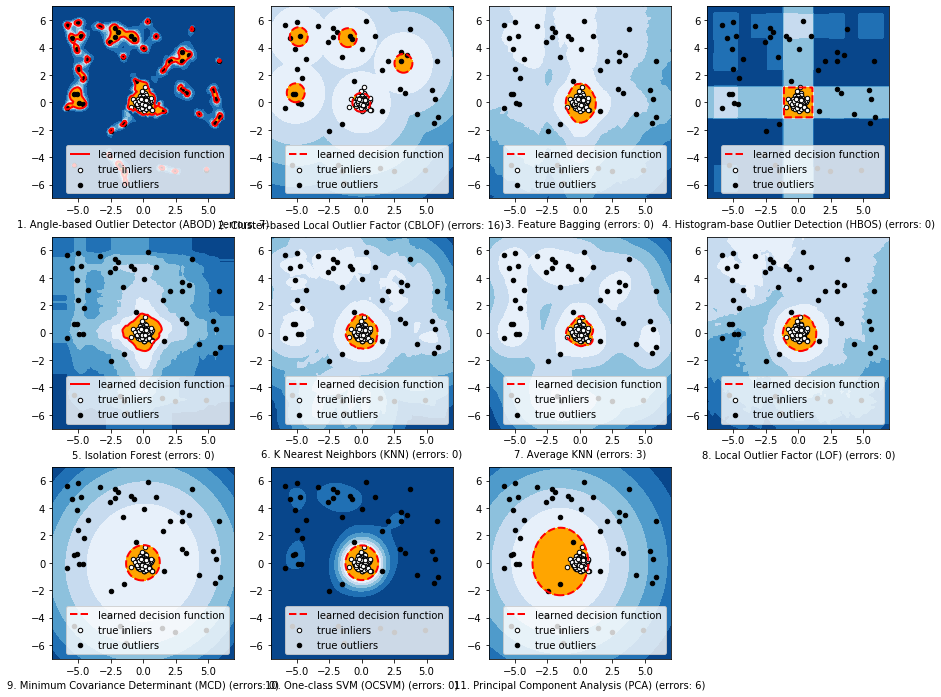

In [125]:
# TO DO: Following is direct copy of
# https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb
    
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

#Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=35),
                       contamination=outliers_fraction,
                       random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'Locally Selective Combination (LSCP)': LSCP(
        detector_list, contamination=outliers_fraction,
        random_state=random_state)
}


# Show all detectors
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)
    
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(3, 4, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()




In [ ]:
#TO DO:

# Artifical Data Generation

The purpose of the following is to provide the audience a structure for several tasks / subtasks that could be investigated for the generation of artificial data to increase the volume of our dataset.

How can we make more data? Transfer learning is still a big question mark, how is it implementable? What is the best way?  

### Artificial Data Generation

TO DO: Augment data with simulation generating mass spectra. 

http://physics.bu.edu/~duffy/HTML5/mass_spectrometer.html

### Other ideas

TO DO: Domain specific

https://venturebeat.com/2020/10/08/the-secrets-of-small-data-how-machine-learning-finally-reached-the-enterprise/amp/

https://www.youtube.com/watch?v=vbhEnEbj3JM


#realtime decision making
https://github.com/parksoy/Soyoung_Udacity_ND_DeepReinforcementLearning/tree/master/p1_navigation
